# Leading the Way

This notebook uses generated .csv files (buses, generators, links, loads, storage_units) as input and run optimization using Gurobi solver. Note: the input files are being read from '1b-LOPF' folder, where generated .csv files by data reader writer notebooks (from PyPSA-GB-H2\data...) are placed.

In [1]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)
os.getcwd()

'C:\\Users\\tatya\\OneDrive - University of Edinburgh\\01 Dissertation\\01 PyPSA\\PyPSA-GB-H2\\notebooks'

In [2]:
import pypsa
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.style.use('ggplot')
import pandas as pd
import cartopy.crs as ccrs

In [3]:
# import csv files

network = pypsa.Network()
network.import_from_csv_folder('1b-LOPF')

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
INFO:pypsa.io:Imported network 1b-LOPF has buses, generators, links, loads, storage_units


In [4]:
# running the optimisation

network.lopf(network.snapshots, solver_name="gurobi", pyomo=False)

INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 8.56s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Set parameter Username
Academic license - for non-commercial use only - expires 2024-07-11
Read LP format model from file C:\Users\tatya\AppData\Local\Temp\pypsa-problem-66ftuvbq.lp
Reading time = 4.38 seconds
obj: 1752000 rows, 788419 columns, 2917080 nonzeros
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1752000 rows, 788419 columns and 2917080 nonzeros
Model fingerprint: 0x679d6953
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e-01, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 1e+04]
Presolve removed 1743240 rows and 718339 columns
Presolve time: 1.16s
Presolved: 8760 rows, 70080 columns, 78840 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA'

INFO:pypsa.linopf:Optimization successful. Objective value: 3.67e+07


('ok', 'optimal')

## 1. Plot Generators

### 1.1 Plot graphs (supply by sector)

In [5]:
# Group the generators by the type, and print their summed power outputs over the simulation period
p_by_carrier = network.generators_t.p.groupby(
    network.generators.type, axis=1).sum()
p_by_carrier

type,Biomass gasification,Imports,Methane Reformation with CCUS,Networked Electrolysis,Non-networked Electrolysis,Nuclear Electrolysis
snapshot,,,,,,
2050-01-01 00:00:00,808.6713,3652.968036,2968.036533,30162.996246,12708.409128,0.0
2050-01-01 01:00:00,808.6713,3652.968036,2968.036533,30203.842022,13542.796749,0.0
2050-01-01 02:00:00,808.6713,3652.968036,2968.036533,30248.270407,13782.279855,0.0
2050-01-01 03:00:00,808.6713,3652.968036,2968.036533,30322.085045,13865.678757,0.0
2050-01-01 04:00:00,808.6713,3652.968036,2968.036533,30278.435242,13522.574346,0.0
...,...,...,...,...,...,...
2050-12-31 19:00:00,808.6713,3652.968036,2968.036533,29496.837439,8872.367883,0.0
2050-12-31 20:00:00,808.6713,3652.968036,2968.036533,29092.701183,8415.240249,0.0
2050-12-31 21:00:00,808.6713,3652.968036,2968.036533,27850.213767,7957.762086,0.0


In [6]:
p_by_carrier.values.sum() / 1e6

242.85691323147296

In [7]:
p_by_carrier['Methane Reformation with CCUS'].values.sum() / 1e6

26.00000002907999

In [8]:
p_by_carrier['Networked Electrolysis'].values.sum() / 1e6

133.93548272110598

In [9]:
p_by_carrier['Non-networked Electrolysis'].values.sum() / 1e6

43.83746989792697

In [10]:
p_by_carrier['Biomass gasification'].values.sum() / 1e6

7.083960587999999

In [11]:
p_by_carrier['Nuclear Electrolysis'].values.sum() / 1e6

0.0

In [12]:
p_by_carrier['Imports'].values.sum() / 1e6

31.999999995359993

In [13]:
# p_by_carrier.to_csv('1b-output\p_supply-by-sector.csv', index=True)

### 1.2 Plot graphs

In [14]:
import matplotlib.patches as mpatches

Text(0.5, 0, '')

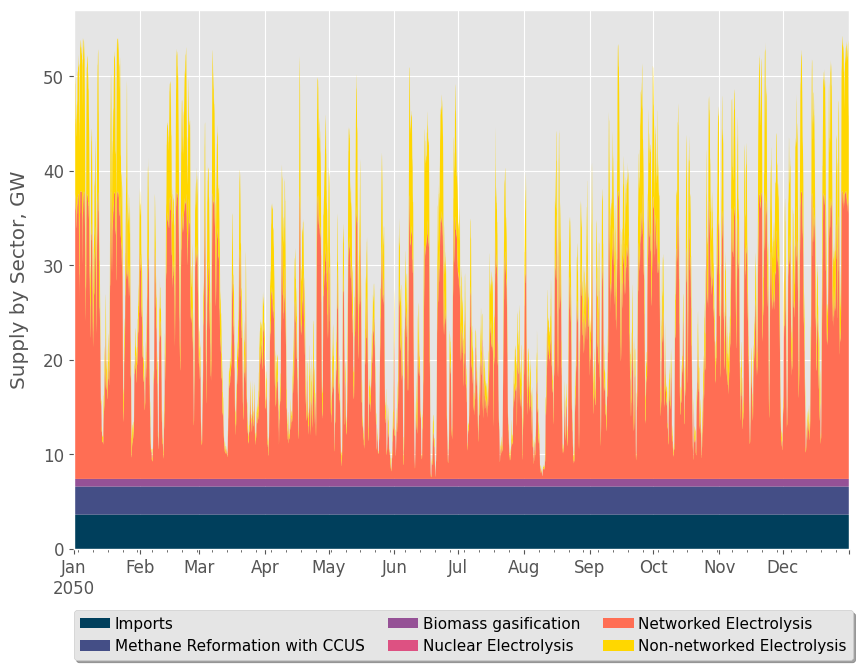

In [15]:
# Graph hydrogen output of the different generation types
cols = ['Imports','Methane Reformation with CCUS', 'Biomass gasification', 'Nuclear Electrolysis', 'Networked Electrolysis',
        'Non-networked Electrolysis']

plt.rcParams.update({'font.size': 12})

p_by_carrier = p_by_carrier[cols]

colors = {'Methane Reformation with CCUS': '#444e86',
          'Biomass gasification': '#955196',
          'Nuclear Electrolysis': '#dd5182',
          'Networked Electrolysis': '#ff6e54',
          'Non-networked Electrolysis': '#FFD700',
          'Imports': '#003f5c'}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,7)
(p_by_carrier / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier.columns])

# Put a legend below current axis
ax.legend(loc='upper left', prop={'size': 11}, bbox_to_anchor=(-0.01, -0.1),
          fancybox=True, shadow=True, ncol=3, handletextpad=0.3, columnspacing=1.5)

ax.set_ylabel("Supply by Sector, GW", labelpad=10)

ax.set_xlabel("")

## 2. Plot Demand

### 2.1 Plot graphs (demand by cluster)

In [16]:
# Print loads by their hydrogen consumption over the simulation period
p_by_cluster = network.loads_t.p
p_by_cluster

Load,St Fergus,Grangemouth,Teesside,Humberside,Theddlethorpe,Merseyside,Barrow,Bacton,Grain LNG,Southampton,South Wales
snapshot,,,,,,,,,,,
2050-01-01 00:00:00,2488.654416,3490.947740,3302.478352,5412.836550,1360.480356,2602.525813,0.0,2837.716824,1171.067661,632.738459,1026.030829
2050-01-01 01:00:00,2494.161899,3503.798532,3318.234889,5429.088738,1382.036566,2642.116181,0.0,2850.644057,1196.400230,646.604633,1047.986675
2050-01-01 02:00:00,2510.029553,3540.823059,3363.631182,5475.913055,1444.142349,2756.180330,0.0,2887.888820,1269.386111,686.554587,1111.243853
2050-01-01 03:00:00,2544.394272,3621.007404,3461.946334,5577.320893,1578.645388,3003.210062,0.0,2968.550132,1427.452277,773.074555,1248.240481
2050-01-01 04:00:00,2606.148475,3765.100543,3638.620958,5759.553145,1820.350490,3447.128256,0.0,3113.500391,1711.500867,928.552957,1494.426618
...,...,...,...,...,...,...,...,...,...,...,...
2050-12-31 19:00:00,2612.533301,3798.641838,3666.616340,5847.720213,1842.840493,3499.952336,0.0,3126.987618,1737.930817,943.019800,1517.379145
2050-12-31 20:00:00,2599.242378,3767.629685,3628.591903,5808.499647,1790.820004,3404.410945,0.0,3095.790993,1676.797036,909.557277,1464.394234
2050-12-31 21:00:00,2564.444305,3686.434180,3529.036954,5705.813012,1654.620822,3154.266060,0.0,3014.112508,1516.737586,821.946254,1325.670019


In [17]:
p_by_cluster.values.sum() / 1e6

242.8569132315

In [18]:
# p_by_cluster.to_csv('1b-output\p_demand-by-cluster.csv', index=True)

Text(0.5, 0, '')

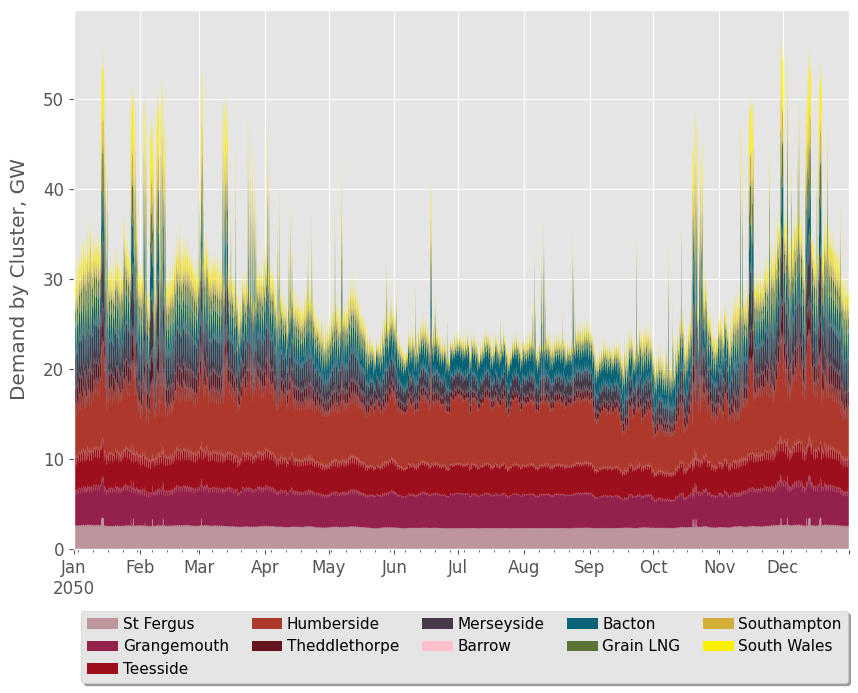

In [19]:
# Graph the hydrogen demand by clusters
cols = ['St Fergus', 'Grangemouth','Teesside', 'Humberside', 'Theddlethorpe', 'Merseyside', 
        'Barrow', 'Bacton', 'Grain LNG', 'Southampton', 'South Wales']

plt.rcParams.update({'font.size': 12})

p_by_cluster = p_by_cluster[cols]

colors = {'St Fergus': '#BD959D',
          'Grangemouth': '#94214B',
          'Teesside': '#9E0F1E',
          'Humberside': '#AD382B',
          'Theddlethorpe': '#63141C',
          'Merseyside': '#463A49',
          'Barrow': 'pink',
          'Bacton': '#096377',
          'Grain LNG': '#5B7436',
          'Southampton': '#D4AF37',
          'South Wales': '#FFEF00'}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,7)
(p_by_cluster / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_cluster.columns])

# Put a legend below current axis
ax.legend(loc='upper left', prop={'size': 11}, bbox_to_anchor=(0, -0.1),
          fancybox=True, shadow=True, ncol=5, handletextpad=0.3, columnspacing=1.5)

ax.set_ylabel("Demand by Cluster, GW", labelpad=10)

ax.set_xlabel("")

### 2.2 Plot graphs (demand by sector)

In [20]:
# read demand by sector folder:
path = '1b-LOPF\demand_input'

In [21]:
# heating
df_heating = pd.read_csv(path+'\h2-heating.csv')
df_heating = df_heating.set_index(['name'])
df_heating['Heating (Residential + Commercial)']=df_heating.iloc[:, 0:10].sum(axis=1)
df_heating = df_heating.filter(['Heating (Residential + Commercial)'], axis=1)

# industy
df_industry = pd.read_csv(path+'\h2-industrial.csv')
df_industry = df_industry.set_index(['name'])
df_industry['Industry']=df_industry.iloc[:, 0:10].sum(axis=1)
df_industry = df_industry.filter(['Industry'], axis=1)

# power generation
df_power = pd.read_csv(path+'\h2-power.csv')
df_power = df_power.set_index(['name'])
df_power['Power Generation']=df_power.iloc[:, 0:10].sum(axis=1)
df_power = df_power.filter(['Power Generation'], axis=1)

# road transport
df_transport = pd.read_csv(path+'\h2-transport.csv')
df_transport = df_transport.set_index(['name'])
df_transport['Road Transport']=df_transport.iloc[:, 0:10].sum(axis=1)
df_transport = df_transport.filter(['Road Transport'], axis=1)

# shipping and aviation (synthetic fuels)
df_fuels = pd.read_csv(path+'\h2-synthetic-fuels.csv')
df_fuels = df_fuels.set_index(['name'])
df_fuels['Synthetic Fuels']=df_fuels.iloc[:, 0:10].sum(axis=1)
df_fuels = df_fuels.filter(['Synthetic Fuels'], axis=1)

# exports
df_exports = pd.read_csv(path+'\h2-daccs.csv')
df_exports = df_exports.set_index(['name'])
df_exports['DACCS']=df_exports.iloc[:, 0:10].sum(axis=1)
df_exports = df_exports.filter(['DACCS'], axis=1)


df_demand = pd.concat([df_heating, df_industry, df_power, df_transport, df_fuels, df_exports], ignore_index=False, axis=1)

Text(0.5, 0, '')

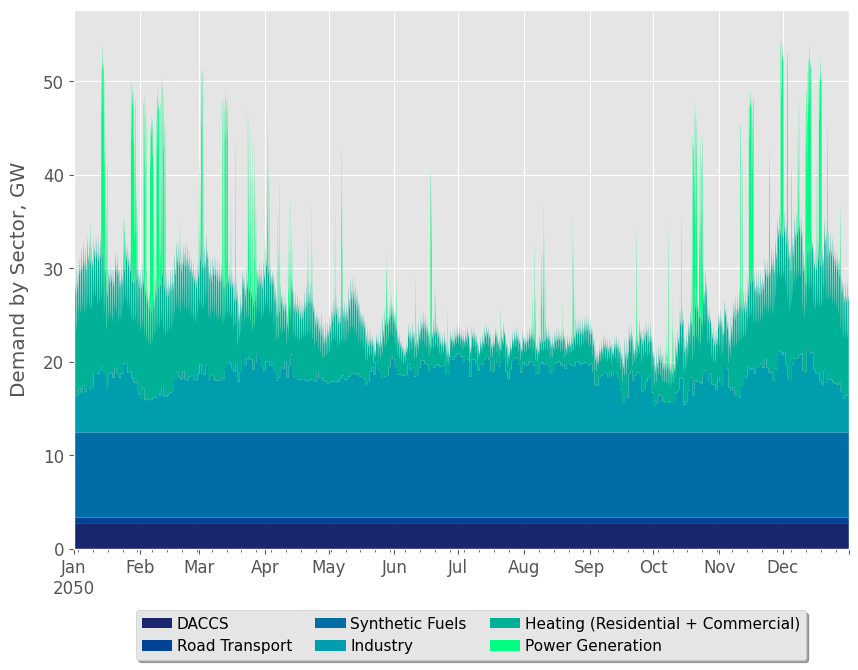

In [22]:
# Graph the hydrogen demand by sectors
cols = ['DACCS','Road Transport','Synthetic Fuels','Industry','Heating (Residential + Commercial)','Power Generation']

plt.rcParams.update({'font.size': 12})

df_demand = df_demand[cols]

df_demand.index = pd.to_datetime(df_demand.index)

colors = {'Heating (Residential + Commercial)': '#00B198',
          'Industry': '#009DAE',
          'Power Generation': '#00FC82',
          'Road Transport': '#004394',
          'Synthetic Fuels': '#006EA5',
          'DACCS': '#1A266D'}

fig, ax = plt.subplots()    
fig.set_size_inches(10,7)
(df_demand / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in df_demand.columns])

ax.margins(x=0)

# Put a legend below current axis
ax.legend(loc='upper left', prop={'size': 11}, bbox_to_anchor=(0.07, -0.1),
          fancybox=True, shadow=True, ncol=3, handletextpad=0.3, columnspacing=1.5)

ax.set_ylabel("Demand by Sector, GW", labelpad=10)

ax.set_xlabel("")

In [23]:
# df_demand.to_csv('1b-output\p_demand-by-sector.csv', index=True)

## 3. Plot Storage

In [24]:
# Group the storage, and print their summed state of charge over the simulation period
p_storage = network.storage_units_t.p.sum(axis=1)
state_of_charge = network.storage_units_t.state_of_charge.sum(axis=1)
state_of_charge

snapshot
2050-01-01 00:00:00    8.733421e+06
2050-01-01 01:00:00    8.760086e+06
2050-01-01 02:00:00    8.786500e+06
2050-01-01 03:00:00    8.811914e+06
2050-01-01 04:00:00    8.834860e+06
                           ...     
2050-12-31 19:00:00    8.641414e+06
2050-12-31 20:00:00    8.658206e+06
2050-12-31 21:00:00    8.674471e+06
2050-12-31 22:00:00    8.690337e+06
2050-12-31 23:00:00    8.707445e+06
Length: 8760, dtype: float64

In [25]:
# state_of_charge.to_csv('1b-output\p_storage.csv', index=True)

Text(0.5, 0, '')

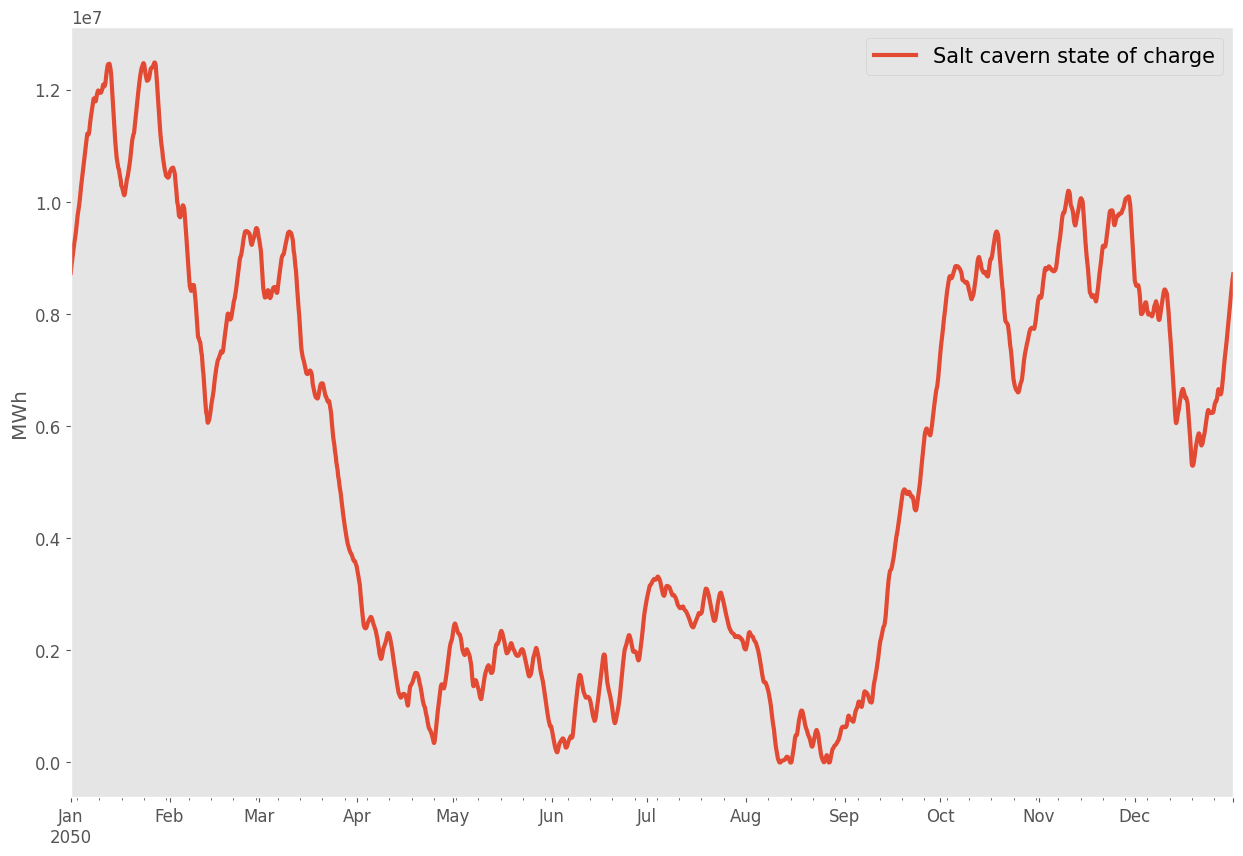

In [26]:
# Graph the storage state of charge and dispatch over the simulation period
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

state_of_charge.plot(label="Salt cavern state of charge", ax=ax, linewidth=3)

ax.legend(prop={'size': 15})
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")

## 4. Plot Line Loading

### 4.1 Mean Loads

In [27]:
# Get mean generator capacity by bus and carrier:

load = network.loads.assign(g=network.loads_t.p.mean()).groupby(["bus"]).g.sum()
flow = pd.Series(10, index=network.branches().index)
load

bus
Bacton           3044.527741
Barrow              0.000000
Grain LNG        1446.950592
Grangemouth      3849.940002
Humberside       7021.517283
Merseyside       2931.007063
South Wales      1232.738074
Southampton       781.984430
St Fergus        2502.401249
Teesside         3487.944795
Theddlethorpe    1424.380693
Name: g, dtype: float64

C:\Users\tatya\Documents\anaconda3\envs\PyPSA-GB\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


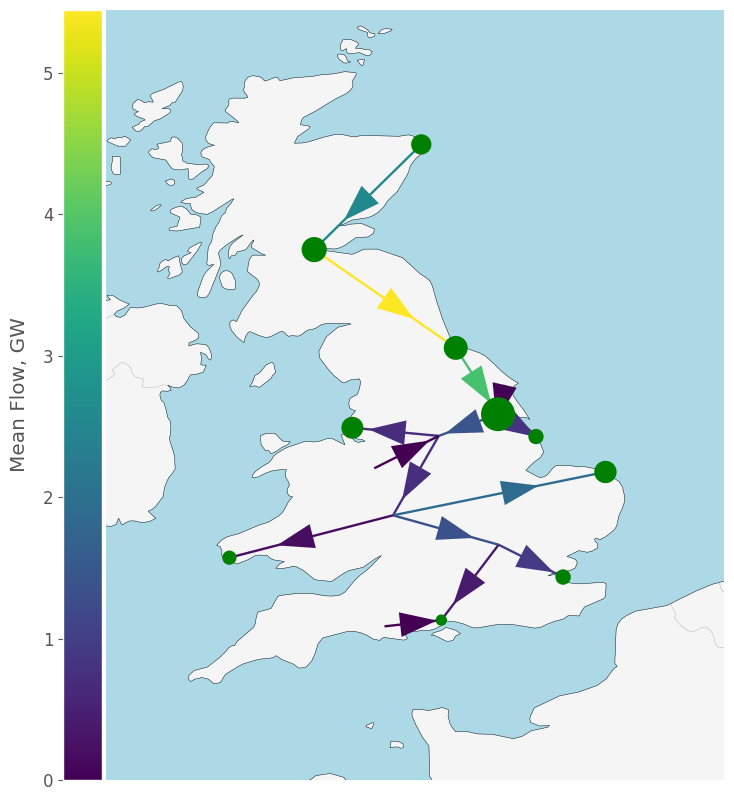

In [28]:
# Plot graph:

plt.rcParams.update({'font.size': 12})

plt.rc('figure', figsize=(15,10))

collection = network.plot(
    bus_sizes=load / 1e5,
    bus_colors='green',
    margin=0.3,
    flow=flow,
    link_widths=1.7,
    projection=ccrs.EqualEarth(),
    color_geomap=True,
    link_colors=network.links_t.p0.mean().abs() / 1e3)

cbar=plt.colorbar(collection[2], fraction=0.04, pad=0.004, location='left')

cbar.set_label('Mean Flow, GW', labelpad=10, loc='center', rotation=90)

plt.show()

### 4.2 Peak Loads

In [29]:
# Get mean generator capacity by bus and carrier:

load = network.loads.assign(g=network.loads_t.p.max()).groupby(["bus"]).g.sum()
flow = pd.Series(10, index=network.branches().index)
load

bus
Bacton            5740.518073
Barrow               0.000000
Grain LNG         5392.664709
Grangemouth       4974.595169
Humberside       12133.345376
Merseyside        8229.712992
South Wales       5896.987123
Southampton       3798.010247
St Fergus         3582.286066
Teesside          4610.930288
Theddlethorpe     3977.259719
Name: g, dtype: float64

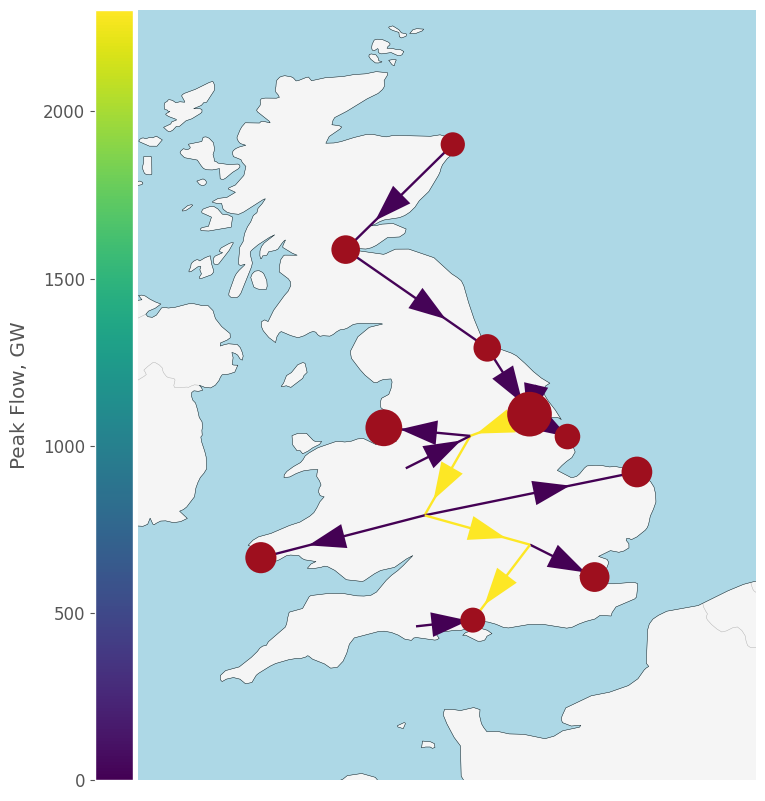

In [30]:
# Plot graph:

plt.rcParams.update({'font.size': 12})

plt.rc('figure', figsize=(15,10))

collection = network.plot(
    bus_sizes=load / 1e5,
    bus_colors='#9E0F1E',
    margin=0.3,
    flow=flow,
    link_widths=1.7,
    projection=ccrs.EqualEarth(),
    color_geomap=True,
    link_colors=network.links_t.p0.max().abs() / 1e3)

cbar=plt.colorbar(collection[2], fraction=0.04, pad=0.004, location='left')

cbar.set_label('Peak Flow, GW', labelpad=10, loc='center', rotation=90)

plt.show()

In [31]:
# network.links_t.p0.mean().abs().to_csv('1b-output\p_links_mean.csv', index=True)

In [32]:
# network.links_t.p0.max().abs().to_csv('1b-output\p_links_max.csv', index=True)

In [33]:
# network.links_t.p0.min().abs().to_csv('1b-output\p_links_min.csv', index=True)